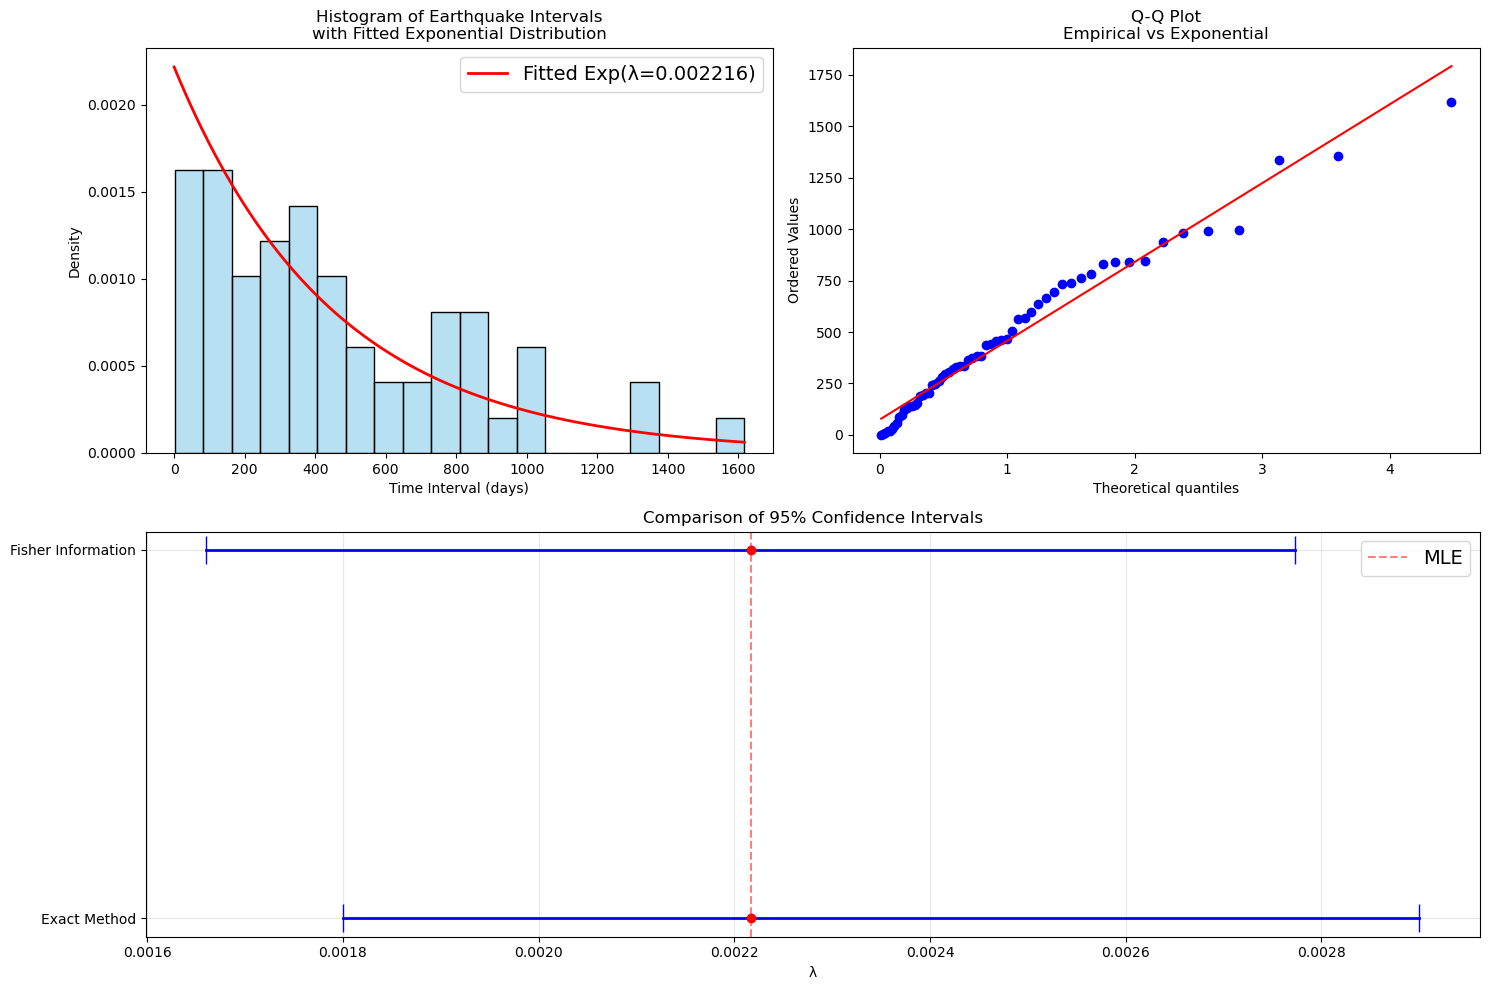

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Data
data = np.array([840, 190, 140, 139, 246, 157, 695, 1336, 780, 1617, 145, 294, 335, 203, 638,
                44, 562, 1354, 436, 937, 337, 21, 454, 30, 735, 121, 763, 6, 384, 381, 507,
                10, 667, 129, 365, 280, 464, 99, 243, 440, 2, 20, 982, 736, 194, 995, 992,
                205, 847, 595, 56, 304, 838, 87, 319, 375, 832, 263, 460, 567, 328])

# Calculate MLE
lambda_hat = len(data) / np.sum(data)
n = len(data)

# Set up the plotting style
fig = plt.figure(figsize=(15, 10))

# 1. Histogram with fitted exponential distribution
ax1 = fig.add_subplot(221)
sns.histplot(data=data, stat='density', bins=20, alpha=0.6, color='skyblue', ax=ax1)

# Generate points for the fitted exponential distribution
x = np.linspace(0, max(data), 100)
y = lambda_hat * np.exp(-lambda_hat * x)
ax1.plot(x, y, 'r-', lw=2, label=f'Fitted Exp(λ={lambda_hat:.6f})')
ax1.set_title('Histogram of Earthquake Intervals\nwith Fitted Exponential Distribution')
ax1.set_xlabel('Time Interval (days)')
ax1.set_ylabel('Density')
ax1.legend(fontsize=14)

# 2. Q-Q Plot
ax2 = fig.add_subplot(222)
stats.probplot(data, dist="expon", plot=ax2)
ax2.set_title('Q-Q Plot\nEmpirical vs Exponential')

# 3. Visualization of Confidence Intervals
ax3 = fig.add_subplot(212)

# Calculate Fisher Information CI
se = np.sqrt((lambda_hat**2) / n)
ci_fisher = [lambda_hat - 1.96 * se, lambda_hat + 1.96 * se]

# Known exact CI
ci_exact = [0.0018, 0.0029]

# Plot confidence intervals
intervals = [
    ('Exact Method', ci_exact),
    ('Fisher Information', ci_fisher)
]

for i, (method, ci) in enumerate(intervals):
    ax3.plot([ci[0], ci[1]], [i, i], 'b-', lw=2)
    ax3.plot([ci[0]], [i], 'b|', ms=20)
    ax3.plot([ci[1]], [i], 'b|', ms=20)
    # Plot point estimate
    ax3.plot([lambda_hat], [i], 'ro')

ax3.set_yticks(range(len(intervals)))
ax3.set_yticklabels([method for method, _ in intervals])
ax3.set_title('Comparison of 95% Confidence Intervals')
ax3.set_xlabel('λ')
ax3.grid(True, alpha=0.3)

# Add vertical line for MLE
ax3.axvline(x=lambda_hat, color='r', linestyle='--', alpha=0.5, label='MLE')
ax3.legend(fontsize=14)

plt.tight_layout()
plt.show()